In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../CLAAS_data/MLbase_DataFrame.csv')

In [9]:
df.columns

Index(['Datum', 'Merkmal', 'Merkmalwert', 'Bestätigte Menge',
       'Relativer Anteil', 'USTR10Y', 'CBIPSFE', 'WeizenSpot', 'RainGer',
       'CornSpot', 'CBI', 'TempGer', 'GER10Y', 'WtiOilSpot', 'SoySpot',
       'CBIPS', 'AgriSpot', 'Jahr', 'Monat', 'Monat_sin', 'Monat_cos'],
      dtype='object')

In [10]:
df

,Datum,Merkmal,Merkmalwert,Bestätigte Menge,Relativer Anteil,USTR10Y,CBIPSFE,WeizenSpot,RainGer,CornSpot,...,TempGer,GER10Y,WtiOilSpot,SoySpot,CBIPS,AgriSpot,Jahr,Monat,Monat_sin,Monat_cos
0,2014-04-01,B10,B10-0030,48,0.125654,2.755,-1.0,222.170,424,215.466,...,1077,1.581,99.74,281.258,9.2,233.772,2014,4,8.660254e-01,-5.000000e-01
1,2014-05-01,B10,B10-0030,42,0.156134,2.613,-12.7,241.438,904,212.924,...,124,1.470,99.42,242.195,0.0,236.510,2014,5,5.000000e-01,-8.660254e-01
2,2014-06-01,B10,B10-0030,19,0.106145,2.527,-24.3,220.032,514,194.965,...,1609,1.368,102.47,242.683,-5.8,214.915,2014,6,1.224647e-16,-1.000000e+00
3,2014-07-01,B10,B10-0030,0,0.000000,2.566,-24.2,204.120,1266,189.725,...,193,1.249,105.34,229.512,-10.5,201.409,2014,7,-5.000000e-01,-8.660254e-01
4,2014-08-01,B10,B10-0030,0,0.000000,2.494,-28.4,189.661,972,168.644,...,1596,1.139,97.88,212.341,-17.5,188.486,2014,8,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16466,2023-08-01,P02,P02-2078,0,0.000000,4.037,-24.1,230.452,1229,219.174,...,1826,2.523,81.37,261.854,-19.3,246.752,2023,8,-8.660254e-01,-5.000000e-01
16467,2023-09-01,P02,P02-2078,0,0.000000,4.187,-41.4,208.562,333,213.242,...,1729,2.545,85.55,270.293,-21.2,238.926,2023,9,-1.000000e+00,-1.836970e-16
16468,2023-10-01,P02,P02-2078,0,0.000000,4.687,-43.2,198.708,1007,217.797,...,1185,2.911,88.82,260.098,-20.5,234.182,2023,10,-8.660254e-01,5.000000e-01
16469,2023-11-01,P02,P02-2078,10,0.033333,4.761,-43.5,196.365,1241,214.936,...,563,2.758,81.04,263.268,-35.9,234.431,2023,11,-5.000000e-01,8.660254e-01


In [11]:
import pandas as pd
import numpy as np

def calculate_correlations(df):
    # Define the columns to calculate Pearson correlation with
    columns_to_correlate = ['USTR10Y', 'CBIPSFE', 'WeizenSpot', 'RainGer', 'CornSpot', 
                            'CBI', 'TempGer', 'GER10Y', 'WtiOilSpot', 'SoySpot', 
                            'CBIPS', 'AgriSpot']
    
    # Store the results in a list
    results = []
    
    # Iterate over unique Merkmal and Merkmalswert combinations
    for merkmal in df['Merkmal'].unique():
        for merkmalwert in df[df['Merkmal'] == merkmal]['Merkmalwert'].unique():
            # Filter the dataframe for the current Merkmal and Merkmalswert
            subset = df[(df['Merkmal'] == merkmal) & (df['Merkmalwert'] == merkmalwert)]
            
            # Calculate the correlation for each specified column
            for col in columns_to_correlate:
                if subset['Relativer Anteil'].notnull().sum() > 0 and subset[col].notnull().sum() > 0:
                    correlation = subset['Relativer Anteil'].corr(subset[col], method='pearson')
                    results.append({
                        'Merkmal': merkmal,
                        'Merkmalwert': merkmalwert,
                        'Variable': col,
                        'Correlation': correlation
                    })
    
    # Convert results to a DataFrame
    result_df = pd.DataFrame(results)
    
    return result_df


In [27]:
## preventing 1.0/-1.0 correlations for variables with no variability

import pandas as pd
import numpy as np

def calculate_correlations_new(df):
    # Define the columns to calculate Pearson correlation with
    columns_to_correlate = ['USTR10Y', 'CBIPSFE', 'WeizenSpot', 'RainGer', 'CornSpot', 
                            'CBI', 'TempGer', 'GER10Y', 'WtiOilSpot', 'SoySpot', 
                            'CBIPS', 'AgriSpot']
    
    # Store the results in a list
    results = []
    
    # Iterate over unique Merkmal and Merkmalswert combinations
    for merkmal in df['Merkmal'].unique():
        for merkmalwert in df[df['Merkmal'] == merkmal]['Merkmalwert'].unique():
            # Filter the dataframe for the current Merkmal and Merkmalswert
            subset = df[(df['Merkmal'] == merkmal) & (df['Merkmalwert'] == merkmalwert)]
            
            # Calculate the correlation for each specified column
            for col in columns_to_correlate:
                # Check if there is variability in both 'Relativer Anteil' and the column
                if subset['Relativer Anteil'].std() > 0 and subset[col].std() > 0:
                    correlation = subset['Relativer Anteil'].corr(subset[col], method='pearson')
                    results.append({
                        'Merkmal': merkmal,
                        'Merkmalwert': merkmalwert,
                        'Variable': col,
                        'Correlation': correlation
                    })
                else:
                    # Append NaN if there is no variability (to avoid unrealistic 1.0 or -1.0)
                    results.append({
                        'Merkmal': merkmal,
                        'Merkmalwert': merkmalwert,
                        'Variable': col,
                        'Correlation': np.nan
                    })
    
    # Convert results to a DataFrame
    result_df = pd.DataFrame(results)
    
    return result_df

In [28]:
correlations_df = calculate_correlations_new(df)
print(correlations_df)

     Merkmal Merkmalwert    Variable  Correlation
0        B10    B10-0030     USTR10Y    -0.328187
1        B10    B10-0030     CBIPSFE     0.504660
2        B10    B10-0030  WeizenSpot    -0.484209
3        B10    B10-0030     RainGer    -0.200239
4        B10    B10-0030    CornSpot    -0.345220
...      ...         ...         ...          ...
4447     P02    P02-2078      GER10Y     0.168597
4448     P02    P02-2078  WtiOilSpot    -0.192034
4449     P02    P02-2078     SoySpot    -0.375575
4450     P02    P02-2078       CBIPS    -0.368463
4451     P02    P02-2078    AgriSpot    -0.385266

[4452 rows x 4 columns]


In [29]:
max_correlations = correlations_df.groupby(['Merkmal', 'Merkmalwert'])['Correlation'].max()
min_correlations = correlations_df.groupby(['Merkmal', 'Merkmalwert'])['Correlation'].min()

print("Maximum correlations per Merkmal and Merkmalwert:")
print(max_correlations)

print("Minimum correlations per Merkmal and Merkmalwert:")
print(min_correlations)

Maximum correlations per Merkmal and Merkmalwert:
Merkmal  Merkmalwert
B10      B10-0030       0.504660
         B10-0033       0.361450
         B10-0035       0.754201
         B10-0036       0.691859
         B10-0038       0.233304
                          ...   
P02      P02-2071       0.768833
         P02-2073       0.282252
         P02-2075       0.567313
         P02-2076       0.625749
         P02-2078       0.313005
Name: Correlation, Length: 371, dtype: float64
Minimum correlations per Merkmal and Merkmalwert:
Merkmal  Merkmalwert
B10      B10-0030      -0.645066
         B10-0033      -0.058987
         B10-0035      -0.110854
         B10-0036      -0.272681
         B10-0038      -0.482328
                          ...   
P02      P02-2071      -0.089440
         P02-2073      -0.541855
         P02-2075      -0.602787
         P02-2076      -0.123223
         P02-2078      -0.385266
Name: Correlation, Length: 371, dtype: float64


In [30]:
# Get the row with the minimum correlation per Merkmal
min_rows = correlations_df.groupby('Merkmal').apply(lambda x: x.loc[x['Correlation'].idxmin()])

# Get the row with the maximum correlation per Merkmal
max_rows = correlations_df.groupby('Merkmal').apply(lambda x: x.loc[x['Correlation'].idxmax()])

# Print the minimum and maximum rows per Merkmal
print("Rows with the minimum correlation per Merkmal:")
print(min_rows)

print("Rows with the maximum correlation per Merkmal:")
print(max_rows)

Rows with the minimum correlation per Merkmal:
        Merkmal Merkmalwert  Variable  Correlation
Merkmal                                           
B10         B10    B10-0175       CBI    -1.000000
G02         G02    G02-0372    GER10Y    -0.881919
N02         N02    N02-0259   SoySpot    -0.832564
N05         N05    N05-0421   CBIPSFE    -0.998636
N08         N08    N08-0921   TempGer    -1.000000
P02         P02    P02-0856  AgriSpot    -0.860606
Rows with the maximum correlation per Merkmal:
        Merkmal Merkmalwert    Variable  Correlation
Merkmal                                             
B10         B10    B10-0175  WeizenSpot     1.000000
G02         G02    G02-0211    CornSpot     0.914883
N02         N02    N02-0259    AgriSpot     0.930438
N05         N05    N05-0426      GER10Y     0.993991
N08         N08    N08-0921    CornSpot     1.000000
P02         P02    P02-2070     USTR10Y     0.817207


In [32]:
average_correlations = correlations_df.groupby('Merkmal')['Correlation'].mean()
print(average_correlations)

Merkmal
B10    0.065115
G02   -0.017303
N02    0.064227
N05    0.009689
N08    0.044077
P02    0.022724
Name: Correlation, dtype: float64


In [52]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_merkmalwert_with_extern(df, merkmalwert, y2_col, x_col='Datum', y1_col='Relativer Anteil'):
    # Ensure the x-axis column is in datetime format if necessary
    if pd.api.types.is_datetime64_any_dtype(df[x_col]) == False:
        df[x_col] = pd.to_datetime(df[x_col])
    
    # Filter the dataframe for the specified Merkmalwert
    df_filtered = df[df['Merkmalwert'] == merkmalwert]
    
    # Create a figure and two axes
    fig, ax1 = plt.subplots()

    # Plot the first y-axis
    y1_label = y1_col
    ax1.plot(df_filtered[x_col], df_filtered[y1_col], label=y1_label, color='blue')
    ax1.set_xlabel(x_col)
    ax1.set_ylabel(y1_label, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis
    ax2 = ax1.twinx()

    # Plot the second y-axis
    y2_label = y2_col
    ax2.plot(df_filtered[x_col], df_filtered[y2_col], label=y2_label, color='red')
    ax2.set_ylabel(y2_label, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    # Set the title and rotate x-axis labels
    title = 'Relativer Anteil and '+ y2_col +' of Merkmalwert ' + merkmalwert + ' over time'
    plt.title(title)
    plt.xticks(rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()


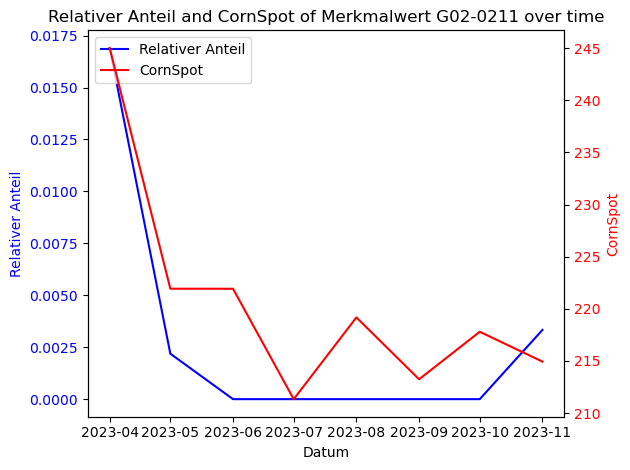

In [53]:
plot_merkmalwert_with_extern(df=df, merkmalwert='G02-0211', y2_col='CornSpot')

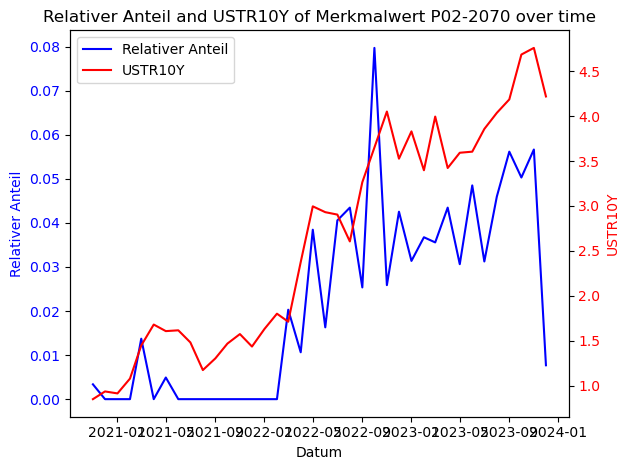

In [54]:
plot_merkmalwert_with_extern(df=df, merkmalwert='P02-2070', y2_col='USTR10Y')

# Correlation based on samples with data over a minimum timespan of 24 months

In [46]:
import pandas as pd
import numpy as np

def calculate_correlations(df, min_months=24):
    # Define the columns to calculate Pearson correlation with
    columns_to_correlate = ['USTR10Y', 'CBIPSFE', 'WeizenSpot', 'RainGer', 'CornSpot', 
                            'CBI', 'TempGer', 'GER10Y', 'WtiOilSpot', 'SoySpot', 
                            'CBIPS', 'AgriSpot']
    
    # Ensure 'Datum' is in datetime format
    df['Datum'] = pd.to_datetime(df['Datum'])
    
    # Store the results in a list
    results = []
    
    # Iterate over unique Merkmal and Merkmalswert combinations
    for merkmal in df['Merkmal'].unique():
        for merkmalwert in df[df['Merkmal'] == merkmal]['Merkmalwert'].unique():
            # Filter the dataframe for the current Merkmal and Merkmalswert
            subset = df[(df['Merkmal'] == merkmal) & (df['Merkmalwert'] == merkmalwert)]
            
            # Calculate the time span in months
            time_span_months = (subset['Datum'].max() - subset['Datum'].min()).days / 30
            
            # Proceed only if the time span is greater than or equal to the minimum required months
            if time_span_months >= min_months:
                # Calculate the correlation for each specified column
                for col in columns_to_correlate:
                    # Check if there is variability in both 'Relativer Anteil' and the column
                    if subset['Relativer Anteil'].std() > 0 and subset[col].std() > 0:
                        correlation = subset['Relativer Anteil'].corr(subset[col], method='pearson')
                        results.append({
                            'Merkmal': merkmal,
                            'Merkmalwert': merkmalwert,
                            'Variable': col,
                            'Correlation': correlation,
                            'Time Span (months)': time_span_months
                        })
                    else:
                        # Append NaN if there is no variability (to avoid unrealistic 1.0 or -1.0)
                        results.append({
                            'Merkmal': merkmal,
                            'Merkmalwert': merkmalwert,
                            'Variable': col,
                            'Correlation': np.nan,
                            'Time Span (months)': time_span_months
                        })
    
    # Convert results to a DataFrame
    result_df = pd.DataFrame(results)
    
    return result_df

In [47]:
correlations_df = calculate_correlations(df)
print(correlations_df)


     Merkmal Merkmalwert    Variable  Correlation  Time Span (months)
0        B10    B10-0030     USTR10Y    -0.328187           33.533333
1        B10    B10-0030     CBIPSFE     0.504660           33.533333
2        B10    B10-0030  WeizenSpot    -0.484209           33.533333
3        B10    B10-0030     RainGer    -0.200239           33.533333
4        B10    B10-0030    CornSpot    -0.345220           33.533333
...      ...         ...         ...          ...                 ...
3127     P02    P02-2076      GER10Y     0.625749           50.733333
3128     P02    P02-2076  WtiOilSpot     0.492538           50.733333
3129     P02    P02-2076     SoySpot     0.460337           50.733333
3130     P02    P02-2076       CBIPS    -0.084955           50.733333
3131     P02    P02-2076    AgriSpot     0.534293           50.733333

[3132 rows x 5 columns]


In [48]:
max_correlations = correlations_df.groupby(['Merkmal', 'Merkmalwert'])['Correlation'].max()
min_correlations = correlations_df.groupby(['Merkmal', 'Merkmalwert'])['Correlation'].min()

print("Maximum correlations per Merkmal and Merkmalwert:")
print(max_correlations)

print("Minimum correlations per Merkmal and Merkmalwert:")
print(min_correlations)

Maximum correlations per Merkmal and Merkmalwert:
Merkmal  Merkmalwert
B10      B10-0030       0.504660
         B10-0033       0.361450
         B10-0035       0.754201
         B10-0036       0.691859
         B10-0038       0.233304
                          ...   
P02      P02-2061       0.501508
         P02-2070       0.817207
         P02-2071       0.768833
         P02-2075       0.567313
         P02-2076       0.625749
Name: Correlation, Length: 261, dtype: float64
Minimum correlations per Merkmal and Merkmalwert:
Merkmal  Merkmalwert
B10      B10-0030      -0.645066
         B10-0033      -0.058987
         B10-0035      -0.110854
         B10-0036      -0.272681
         B10-0038      -0.482328
                          ...   
P02      P02-2061      -0.267977
         P02-2070      -0.705893
         P02-2071      -0.089440
         P02-2075      -0.602787
         P02-2076      -0.123223
Name: Correlation, Length: 261, dtype: float64


In [55]:
# Get the row with the maximum correlation per Merkmal
max_rows = correlations_df.groupby('Merkmal').apply(lambda x: x.loc[x['Correlation'].idxmax()])

# Get the row with the minimum correlation per Merkmal
min_rows = correlations_df.groupby('Merkmal').apply(lambda x: x.loc[x['Correlation'].idxmin()])

# Print the minimum and maximum rows per Merkmal
print("Rows with the maximum correlation per Merkmal:")
print(max_rows)

print("Rows with the minimum correlation per Merkmal:")
print(min_rows)

Rows with the maximum correlation per Merkmal:
        Merkmal Merkmalwert    Variable  Correlation  Time Span (months)
Merkmal                                                                 
B10         B10    B10-0035  WtiOilSpot     0.754201           90.266667
G02         G02    G02-0486      GER10Y     0.817907           37.500000
N02         N02    N02-0559     USTR10Y     0.776571           46.633333
N05         N05    N05-0084      GER10Y     0.828872           28.400000
N08         N08    N08-0800     USTR10Y     0.857169           46.633333
P02         P02    P02-2070     USTR10Y     0.817207           37.500000
Rows with the minimum correlation per Merkmal:
        Merkmal Merkmalwert    Variable  Correlation  Time Span (months)
Merkmal                                                                 
B10         B10    B10-0030  WtiOilSpot    -0.645066           33.533333
G02         G02    G02-0486       CBIPS    -0.751674           37.500000
N02         N02    N02-0558   

In [50]:
average_correlations = correlations_df.groupby('Merkmal')['Correlation'].mean()
print(average_correlations)

Merkmal
B10    0.104917
G02   -0.022310
N02    0.063190
N05    0.030153
N08    0.047776
P02    0.031045
Name: Correlation, dtype: float64


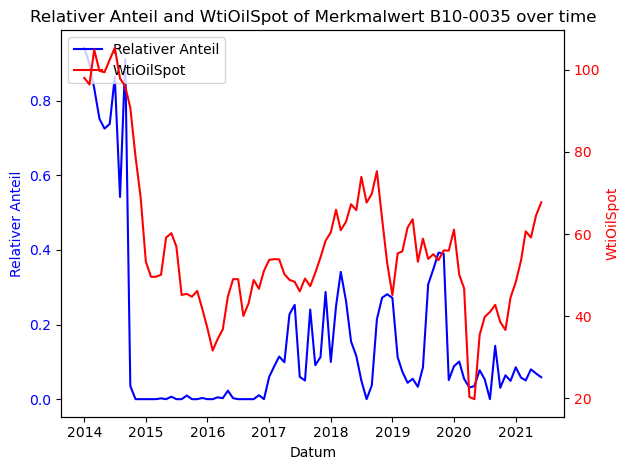

In [56]:
plot_merkmalwert_with_extern(df=df, merkmalwert='B10-0035', y2_col='WtiOilSpot')